# Algebra liniowa z zastosowaniami 1

## Ćwiczenia w sali komputerowej nr 1

### Przygotowanie do pracy

Uzupełnij poniższą zmienną `IMIE_NAZWISKO` swoim imieniem i nazwiskiem, a następnie ją uruchom - dzięki temu sprawdzisz, czy kernel Pythona działa poprawnie.

In [1]:
IMIE_NAZWISKO = "Daniel Stodulski"

print(IMIE_NAZWISKO)

Daniel Stodulski


### NumPy

Podczas dzisiejszych zajęć skoncentrujemy się na bibliotece [NumPy](https://numpy.org), czyli najpopularniejszej i otwartoźródłowej bibliotece, która pozwala na wygodne i wydajne obliczenia numeryczne w Pythonie. Poniższe materiały i grafiki są w głównej mierze zaczerpnięte z artykułu [NumPy Illustrated: The Visual Guide to NumPy](https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d), którego autorem jest Lev Maximov.

Numpy jest mocno wykorzystywany podczas przetwarzania danych, stanowiąc podstawę dla takich bibliotek jak [Pandas](https://pandas.pydata.org/) (analiza i przetwarzanie danych) czy też [OpenCV](https://opencv.org/) (sztuczna inteligencja i widzenie komputerowe). API stosowane przez tę bibliotekę jest na tyle uniwersalne i wygodne, że znajomość jej obsługi jest wręcz niezbędna do sprawnego programowania rozwiązań z zakresu głębokiego uczenia sieci neuronowych przy pomocy takich bibliotek jak [PyTorch](https://pytorch.org/) czy [TensorFlow](https://www.tensorflow.org/).

W systemach debianowych bibliotekę można zainstalować globalnie pakiet poprzez polecenie `sudo apt install python3-numpy`, ew. w [wirtualnym środowisku](https://docs.python.org/3/library/venv.html) poprzez menedżer `pip` poleceniem `pip install numpy`. Na komputerach wydziałowych biblioteka ta jest już zainstalowana.

Załadujmy tę bibliotekę:

In [2]:
import numpy as np

Do generowania wykresów użyjemy biblioteki [Matplotlib](https://matplotlib.org/). W systemach debianowych bibliotekę można zainstalować globalnie pakiet poprzez polecenie `sudo apt install python3-matplotlib`, ew. w [wirtualnym środowisku](https://docs.python.org/3/library/venv.html) poprzez menedżer `pip` poleceniem `pip install matplotlib`. Na komputerach wydziałowych biblioteka ta jest już zainstalowana.

In [3]:
import matplotlib.pyplot as plt

#### Tablice Numpy a listy w Pythonie

Pierwszą różnicą pomiędzy tablicami Numpy a tradycyjnymi listami Pythona jest sposób działania operacji związanych z działaniami arytmetycznymi. Poniżej możemy zauważyć, że `*` i `+` w przypadku zwykłych list powoduje odpowiednio dublowanie listy i łączenie list, natomiast do mnożenia i dodawania poszczególnych elementów musimy użyć list składanych:

In [4]:
a = [1, 2, 3]

In [5]:
a * 2

[1, 2, 3, 1, 2, 3]

In [6]:
[q * 2 for q in a]

[2, 4, 6]

In [7]:
a = [1, 2, 3]
b = [4, 5, 6]

In [8]:
a + b

[1, 2, 3, 4, 5, 6]

In [9]:
[q + r for q, r in zip(a, b)]

[5, 7, 9]

W przypadku Numpy listę tworzymy poprzez wywołanie funkcji [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) (uwaga: możesz sprawdzić, że wspomniana przed chwilą funkcja jest interaktywnym linkiem do dokumentacji; tam, gdzie jest to możliwe, w materiałach zostały umieszczone linki do dokumentacji przy nazwach funkcji Numpy):

In [10]:
a = np.array([1, 2, 3])

Możemy teraz sprawdzić jak zachowują się operatory `*` i `+`:

In [11]:
a * 2

array([2, 4, 6])

In [12]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

In [13]:
a + b

array([5, 7, 9])

Jeśli chodzi o krótkie podsumowanie różnic, to tablice Numpy, w stosunku do zwykłych list Pythona, są bardziej zwięzłe i wygodniejsze w obsłudze (w szczególności tablice wielowymiarowe), można na nich wykonywać wydajniejsze operacje w przypadku wektoryzacji, działają wolniej w przypadku dopisywania elementów oraz działają najwydajniej w przypadku jednorodnego typu danych w tablicy.

#### Wektory i tablice 1-wymiarowe

##### Inicjalizacja

Jak widzieliśmy wyżej, utworzenie tablicy Numpy odbywa się poprzez wywołanie funkcji [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html). Zwrócona instancja tablicy ma atrybuty `dtype` oraz `shape`, które są związane z odpowiednio przechowywanym [typem danych](https://numpy.org/doc/stable/user/basics.types.html) oraz [wymiarami tablicy](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html). Poniżej utworzymy tablicę 3-elementową o danych będących liczbami rzeczywistymi:

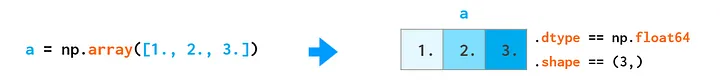

In [14]:
a = np.array([1., 2., 3.])

In [15]:
a

array([1., 2., 3.])

In [16]:
a.dtype

dtype('float64')

In [17]:
a.dtype == np.float64

True

In [18]:
a.shape

(3,)

Zwróćmy uwagę, że mamy do czynienia z 3-elementową tablicą 1-wymiarową i powyżej mamy zwrócą krotkę, a nie pojedynczą wartość. Tablice mogą mieć więcej wymiarów, w związku z tym krotki zwracane przez atrybut `shape` mogą być dłuższe. Przyjrzymy się temu w dalszej części materiałów.

Zwróćmy jeszcze uwagę na to, że możemy utworzyć `a` podając wprost typ danych podczas inicjalizacji. W poniższym przykładzie lista liczb całkowitych jest konwertowana na typ zmienno przecinkowy:

In [19]:
a = np.array([1, 2, 3], dtype=np.float64)

In [20]:
a

array([1., 2., 3.])

In [21]:
a.dtype

dtype('float64')

In [22]:
a.dtype == np.float64

True

Tablice Numpy najlepiej sprawdzają się w przypadku jednorodnych typów danych, jednak jest również możliwość umieszczenia w nich danych różnego typu. Należy w takiej sytuacji umieścić atrybut `dtype` z wartością `'object'` podczas inicjalizacji tablicy:

In [23]:
np.array([1., 'xy', 2], dtype='object')

array([1.0, 'xy', 2], dtype=object)

Zauważmy, że jeśli pominiemy ww. `dtype`, to dane zostaną automatycznie zrzutowane na 32-bitowe ciągi znaków w formie little endian (por. [How to interpret Python output dtype='<U32'?](https://stackoverflow.com/a/56944901) i [Kolejność bajtów](https://pl.wikipedia.org/wiki/Kolejno%C5%9B%C4%87_bajt%C3%B3w)):

In [24]:
np.array([1., 'xy', 2])

array(['1.0', 'xy', '2'], dtype='<U32')

Możemy również inicjalizować tablice ze wstępnie wyzerowanymi elementami przy pomocy [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

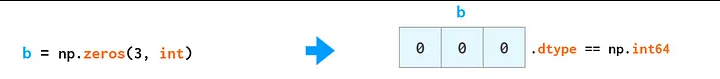

In [25]:
b = np.zeros(3, int)

In [26]:
b.dtype

dtype('int64')

In [27]:
b.dtype == np.int64

True

W Numpy możemy użyć struktury jednej tablicy do stworzenia drugiej tablicy. Służą do tego funkcje o nazwach kończących się na `_like`. Przykładowo, możemy użyć funkcji [`np.zeros_like()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html).

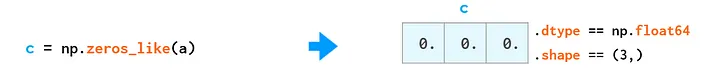

In [28]:
c = np.zeros_like(a)

In [29]:
c

array([0., 0., 0.])

In [30]:
c.dtype

dtype('float64')

In [31]:
c.shape

(3,)

Poza funkcją [`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html), najczęściej wykorzystuje się funkcje wypełniające tablice jedynkami [`np.ones()`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), określoną wartością [`np.full()`](https://numpy.org/doc/stable/reference/generated/numpy.full.html) lub w ogóle pomijającą inicjalizację [`np.empty()`](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) (nie mamy gwarancji jakie otrzymamy wartości). Funkcje te mają swoje odpowiedniki `_like`, tj. [`np.ones_like()`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html), [`np.full_like()`](https://numpy.org/doc/stable/reference/generated/numpy.full_like.html) i [`np.empty_like()`](https://numpy.org/doc/stable/reference/generated/numpy.empty_like.html). Zwróćmy uwagę, że domyślnie tworzą one tablice o elementach będących liczbami rzeczywistymi.

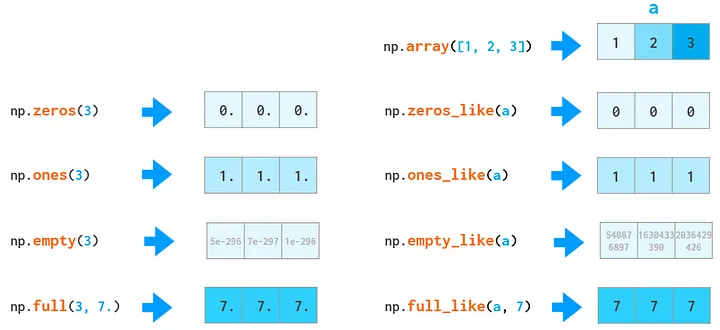

In [32]:
np.zeros(3)

array([0., 0., 0.])

In [33]:
np.ones(3)

array([1., 1., 1.])

In [34]:
np.empty(3)

array([1., 1., 1.])

In [35]:
np.full(3, 7.)

array([7., 7., 7.])

In [36]:
np.array([1, 2, 3])

array([1, 2, 3])

In [37]:
np.zeros_like(a)

array([0., 0., 0.])

In [38]:
np.ones_like(a)

array([1., 1., 1.])

In [39]:
np.empty_like(a)

array([1., 1., 1.])

In [40]:
np.full_like(a, 7)

array([7., 7., 7.])

Do tworzenia sekwencji można wykorzystać dwie funkcje, tj. [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) i [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

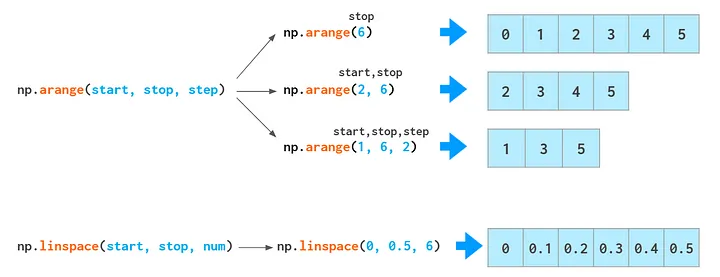

In [41]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [42]:
np.arange(2, 6)

array([2, 3, 4, 5])

In [43]:
np.arange(1, 6, 2)

array([1, 3, 5])

In [44]:
np.linspace(0, 0.5, 6)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

Funkcja [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) potrafi zachowywać się dość nietypowo w przypadku pracy na liczbach rzeczywistych. Zwróćmy uwagę na końcowe elementy dwóch poniższych list, które powinny być takie same:

In [45]:
np.arange(0.4, 0.8, 0.1)

array([0.4, 0.5, 0.6, 0.7])

In [46]:
np.arange(0.5, 0.8, 0.1)

array([0.5, 0.6, 0.7, 0.8])

W obu przypadkach mamy inkrementację o wartość `0.1`, której konsekwencje reprezentacji w pamięci komputera [klasycznie generują problemy](https://0.30000000000000004.com/) (por. również [07. Liczby rzeczywiste. Arytmetyka komputerowa](https://wstepmatinf.wmi.amu.edu.pl/07_wstep_mat.html) z kursu "Wstęp do matematyki"). Inkrementacja o liczbę rzeczywistą może wygenerować nam błąd typu [Off by one](https://en.wikipedia.org/wiki/Off-by-one_error).

Poniżej mamy pewną funkcję pomocniczą (jest implementacja nie jest tu zasadniczo kluczowa), która posłuży nam do wyświetlenia reprezentacji binarnej danej liczby rzeczywistej. Porównując `0.8` i `0.7+0.1` możemy zauważyć, że różnica występuje na dwóch ostatnich bitach:

In [47]:
import struct
def float64_to_binary(num):
    return format(struct.unpack('!Q', struct.pack('!d', num))[0], '064b')

print(float64_to_binary(0.8), 0.8)
print(float64_to_binary(0.7+0.1), 0.7+0.1)

0011111111101001100110011001100110011001100110011001100110011010 0.8
0011111111101001100110011001100110011001100110011001100110011001 0.7999999999999999


Jeśli musimy skorzystać z [`np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), to możemy mitygować błąd poprzez zmianę drugiego argumentu, tj. `stop`, ustawiając go na jakąś "bezpieczną" wartość, np. `0.75`:

In [48]:
np.arange(0.5, 0.75, 0.1)

array([0.5, 0.6, 0.7])

Bezpieczniejszym rozwiązaniem jest skorzystanie z [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), która nie jest podatna na ww. błąd i w której podajemy liczbę elementów do wygenerowania w podanym zakresie:

In [49]:
np.linspace(0.5, 0.7, 3)

array([0.5, 0.6, 0.7])

Z drugiej strony, musimy uważać podczas podawania liczby kroków, ponieważ nie zawsze na pierwszy rzut oka jest to zgodne z intuicją:

In [50]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [51]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Możemy tworzyć również tablice o losowych elementach. W celu zapewnienia odtwarzalności wyników wykorzystujemy funkcję [`np.random.default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) z ustawionym parametrem `seed`, tak aby uzyskać generator. Następnie możemy wykorzystać w takim generatorze metody np. [`integers()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html), [`random()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html), [`uniform()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html), [`standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html) lub [`normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).

Uwaga: powyższy opis dotyczy nowego interfejsu generowania losowych liczb, który został wprowadzony od wersji biblioteki 1.17. Cały czas dostępny jest interfejs *legacy*, który nadal można spotkać w zewnętrznych kodach i w którym wykorzystuje się bezpośrednio funkcje modułu `numpy.random`, np. [`np.random.rand()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html).

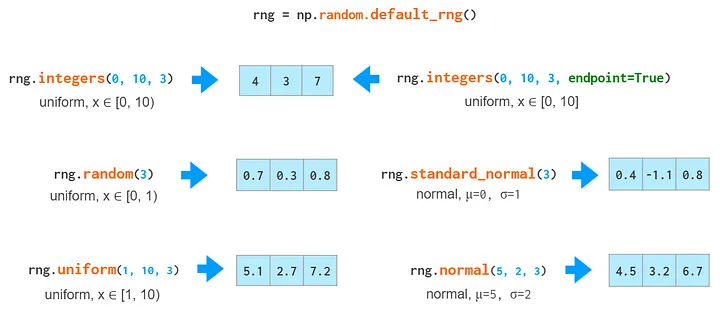

In [52]:
rng = np.random.default_rng(seed=1337)

In [53]:
rng.integers(0, 10, 3)

array([5, 8, 7])

In [54]:
rng.integers(0, 10, 3, endpoint=True)

array([ 2,  5, 10])

In [55]:
rng.random(3)

array([0.94656586, 0.87450809, 0.11574276])

In [56]:
rng.uniform(1, 10, 3)

array([2.74358496, 4.07563478, 5.4621181 ])

In [57]:
rng.standard_normal(3)

array([ 0.1483361 , -0.08612338,  2.12161821])

In [58]:
rng.normal(5, 2, 3)

array([6.03003585, 3.93427288, 7.47561979])

In [59]:
rng.integers(0, 10, 3)

array([7, 3, 4])

Zauważmy, że ponowne ustawienie generatora z takim samym argumentem `seed` spowoduje wygenerowanie takiej samej tablicy, co wcześniej:

In [60]:
rng = np.random.default_rng(seed=1337)

In [61]:
rng.integers(0, 10, 3)

array([5, 8, 7])

##### Indeksowanie

Dostęp do poszczególnych elementów tablicy jest bardzo podobny jak w przypadku zwykłych list, np. poprzez wycinki (ang. *slices*). Wszystkie przedstawione poniżej metody indeksowania, z wyjątkiem tzw. *fancy indexing*, są tzw. widokami (ang. *views*), co oznacza, że nie przechowują one swojej kopii danych i odzwierciedlają zmiany w oryginalnej tablicy, o ile zdarzy się, że zostanie ona zmieniona po indeksowaniu.

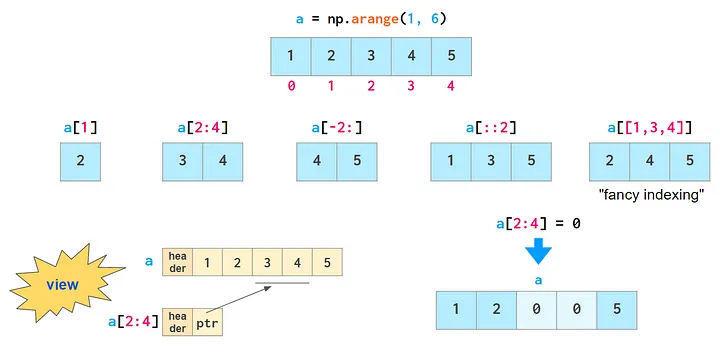

In [62]:
a = np.arange(1, 6)

In [63]:
a[1]

np.int64(2)

In [64]:
a[2:4]

array([3, 4])

In [65]:
a[-2:]

array([4, 5])

In [66]:
a[::2]

array([1, 3, 5])

In [67]:
a[[1,3,4]]

array([2, 4, 5])

In [68]:
a[2:4] = 0
a

array([1, 2, 0, 0, 5])

Podczas korzystania z wycinków należy zwrócić uwagę, że w odróżnieniu do zwykłej listy Pythona nie jest tworzona kopia tablicy.

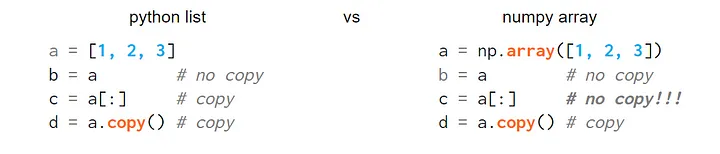

Spójrzmy na przykład z listą Pythona:

In [69]:
a = [1, 2, 3]
a

[1, 2, 3]

In [70]:
c = a[:]
c[2] = 0
c

[1, 2, 0]

Lista w zmiennej `a` nie została zmieniona:

In [71]:
a

[1, 2, 3]

Teraz porównajmy to z tablicą Numpy:

In [72]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [73]:
c = a[:]
c[2] = 0
c

array([1, 2, 0])

Tablica w zmiennej `a` została zmieniona:

In [74]:
a

array([1, 2, 0])

Do kopiowania tablicy możemy użyć metody [`copy()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.copy.html):

In [75]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [76]:
c = a.copy()
c[2] = 0
c

array([1, 2, 0])

In [77]:
a

array([1, 2, 3])

Poniżej możemy zobaczyć jak wykorzystać tzw. indeksowanie logiczne, wykorzystując przy tym funkcje [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) i [`np.any()`](https://numpy.org/doc/stable/reference/generated/numpy.any.html).

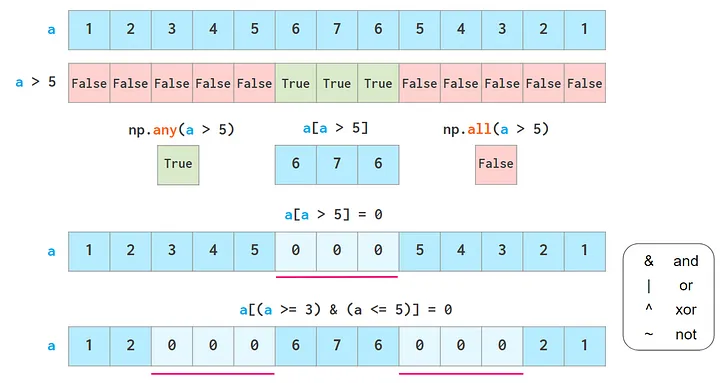

In [78]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
a

array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])

In [79]:
a > 5

array([False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [80]:
a[a > 5]

array([6, 7, 6])

In [81]:
np.any(a > 5)

np.True_

In [82]:
np.all(a > 5)

np.False_

In [83]:
a[a > 5] = 0
a

array([1, 2, 3, 4, 5, 0, 0, 0, 5, 4, 3, 2, 1])

In [84]:
a[(a >= 3) & (a <= 5)] = 99 # 3<=a<=5 nie działa!
a

array([ 1,  2, 99, 99, 99,  0,  0,  0, 99, 99, 99,  2,  1])

Dodatkowo możemy wykorzystać funkcje [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) i [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) do ustawienia wartości w tablicy odpowiednio względem wyniku testu warunku logicznego lub po prostu przycinając wartości tablicy do zadanego zakresu.

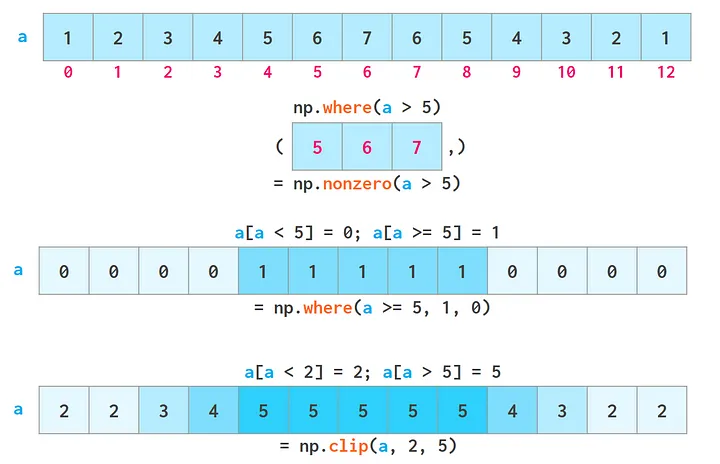

In [85]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])

In [86]:
np.where(a > 5)

(array([5, 6, 7]),)

In [87]:
np.nonzero(a > 5)

(array([5, 6, 7]),)

In [88]:
np.where(a >= 5, 1, 0)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [89]:
np.clip(a, 2, 5)

array([2, 2, 3, 4, 5, 5, 5, 5, 5, 4, 3, 2, 2])

##### Operacje na wektorach

Operacje artymetyczne na wektorach są w Numpy bardzo wydajne ze względu na ich realizację na poziomie C++.

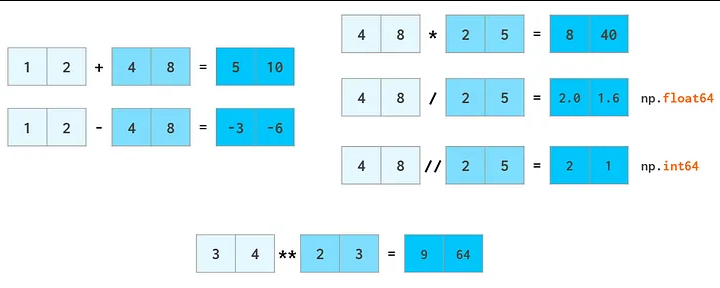

In [90]:
a = np.array([1, 2])
b = np.array([4, 8])

In [91]:
a + b

array([ 5, 10])

In [92]:
a - b

array([-3, -6])

In [93]:
c = np.array([2, 5])

In [94]:
b * c

array([ 8, 40])

In [95]:
b / c

array([2. , 1.6])

In [96]:
(b / c).dtype

dtype('float64')

In [97]:
b // c

array([2, 1])

In [98]:
(b // c).dtype

dtype('int64')

In [99]:
g = np.array([3, 4])
h = np.array([2, 3])

In [100]:
g ** h

array([ 9, 64])

W powyższych przykładach widzieliśmy operacje wykonywane na tablicach 2-elementowych. Możliwe są również operacje wykonywane na skalarach lub mniejszych tablicach. W takim przypadku, jeśli to możliwe, stosowany jest tzw. [*broadcasting*](https://numpy.org/doc/stable/user/basics.broadcasting.html), tj. wymiary mniejszej tablicy są automatycznie poszerzane do rozmiarów większej tablicy, tak aby ich wymiary były takie same (działanie to będzie lepiej widoczne w dalszej części materiałów podczas omawiania tablic 2-wymiarowych).

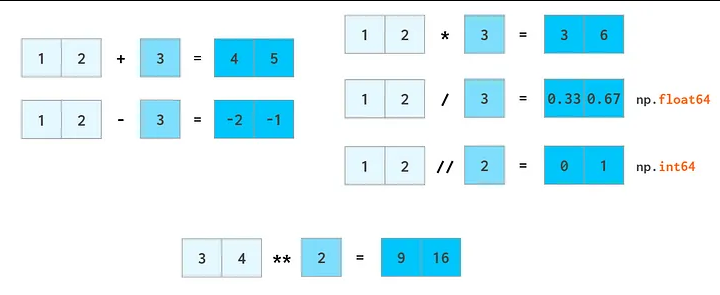

In [101]:
a = np.array([1, 2])
b = 3

In [102]:
a + b

array([4, 5])

In [103]:
a - b

array([-2, -1])

In [104]:
a * b

array([3, 6])

In [105]:
a / b

array([0.33333333, 0.66666667])

In [106]:
(a / b).dtype

dtype('float64')

In [107]:
c = 2
a // c

array([0, 1])

In [108]:
(a // c).dtype

dtype('int64')

In [109]:
d = np.array([3, 4])

In [110]:
d ** 2

array([ 9, 16])

Numpy ma swoje odpowiedniki [funkcji matematycznych](https://numpy.org/doc/stable/reference/routines.math.html) znanych ze standardowego modułu `math`.

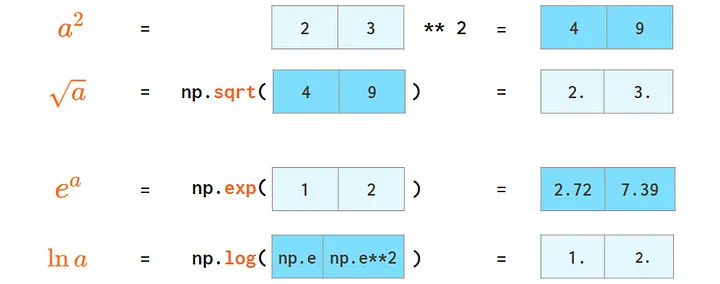

In [111]:
a = np.array([4, 9])
np.sqrt(a)

array([2., 3.])

In [112]:
a = np.array([1, 2])
np.exp(a)

array([2.71828183, 7.3890561 ])

In [113]:
a = np.array([np.e, np.e ** 2])
np.log(a)

array([1., 2.])

Dostępne są również funkcje dla iloczynu skalarnego [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) (alias operacji `@`) i iloczynu wektorowego [`np.cross()`](https://numpy.org/doc/stable/reference/generated/numpy.cross.html). Dostępne są również [stałe](https://numpy.org/doc/stable/reference/constants.html), np. [`np.e`](https://numpy.org/doc/stable/reference/constants.html#numpy.e).

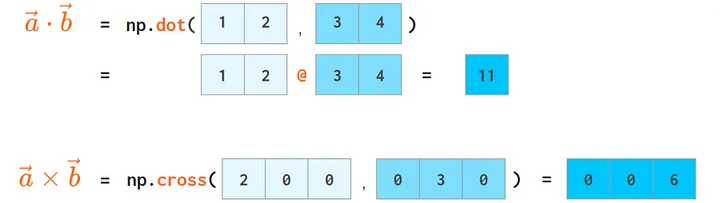

In [114]:
a = np.array([1, 2])
b = np.array([3, 4])

In [115]:
np.dot(a, b)

np.int64(11)

In [116]:
a @ b

np.int64(11)

In [117]:
a = np.array([2, 0, 0])
b = np.array([0, 3, 0])

In [118]:
np.cross(a, b)

array([0, 0, 6])

Poniżej mamy przykład użycia funkcji trygonometrycznej ze stałą π [`np.pi`](https://numpy.org/doc/stable/reference/constants.html#numpy.pi):

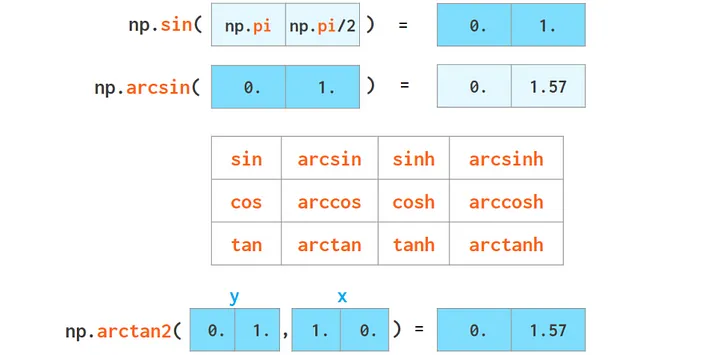

In [119]:
a = np.array([np.pi, np.pi/2])
np.sin(a)

array([1.2246468e-16, 1.0000000e+00])

Do zaokrąglania możemy użyć funkcji [`np.floor()`](https://numpy.org/doc/stable/reference/generated/numpy.floor.html), [`np.ceil()`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html) i [`np.round()`](https://numpy.org/doc/stable/reference/generated/numpy.round.html).

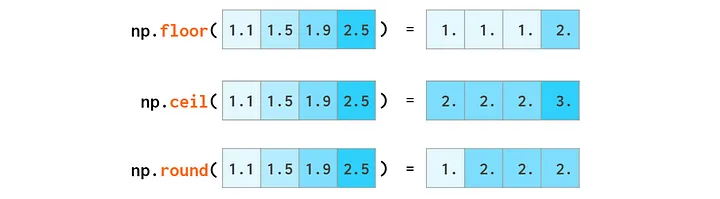

In [120]:
a = np.array([1.1, 1.5, 1.9, 2.5])

In [121]:
np.floor(a)

array([1., 1., 1., 2.])

In [122]:
np.ceil(a)

array([2., 2., 2., 3.])

In [123]:
np.round(a)

array([1., 2., 2., 2.])

Z tablic możemy poprzez odpowiednie metody wyciągnąć podstawowe statystyki, np. [`max()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), [`min()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`sum()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sum.html), [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html), [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmax.html) i [`argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html).

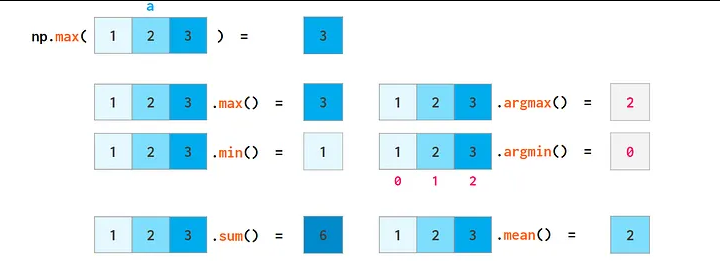

In [124]:
a = np.array([1, 2, 3])

In [125]:
np.max(a)

np.int64(3)

In [126]:
np.argmax(a)

np.int64(2)

In [127]:
np.min(a)

np.int64(1)

In [128]:
np.argmin(a)

np.int64(0)

In [129]:
np.sum(a)

np.int64(6)

In [130]:
np.mean(a)

np.float64(2.0)

Sortowanie danych w tablicy odbywa się albo w miejscu poprzez metodę [`sort()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html), albo poprzez funkcję [`np.sort()`](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) zwracającą kopię tablicy.

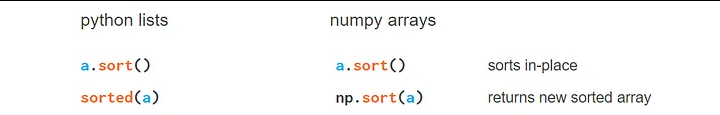

In [131]:
a = np.array([4, 2, 7, 3, 5])

In [132]:
a.sort()

In [133]:
a

array([2, 3, 4, 5, 7])

In [134]:
a = np.array([4, 2, 7, 3, 5])

In [135]:
np.sort(a)

array([2, 3, 4, 5, 7])

In [136]:
a

array([4, 2, 7, 3, 5])

##### Zadanie 1 (1 pkt)

Załóżmy, że chcemy wyprodukować 20 litrów lagera z następujących składników: chmiel, słód, woda i drożdże (por. [Reinheitsgebot — Bawarskie Prawo Czystości](https://piwolucja.pl/felietony/reinheitsgebot-bawarskie-prawo-czystosci/)).

Koszt składników jest następujący:

* chmiel: 0.12 zł / g, 
* słód: 6.80 zł / kg,
* woda: 0.01 zł / L,
* drożdże: 0.07 zł / g.

Do wyprodukowania 20 litrów lagera potrzebujemy:

* chmiel: 65 g, 
* słód: 4.2 kg,
* woda: 25 L,
* drożdże: 12 g.

Łączny koszt produkcji to $0.12 \cdot 65 + 6.80 \cdot 4.2 + 0.01 \cdot 25 + 0.07 \cdot 12$ i możemy go wyliczyć jako iloczyn skalarny dwóch wektorów.

1. Stwórz dwa wektory:
   * pierwszy o nazwie `price` opisujący koszt jednostkowy składników, 
   * drugi o nazwie `quantity` opisujący ilość potrzebnych składników.
2. Wykorzystaj funkcję [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) do obliczenia łącznego kosztu składników do produkcji 20 litrów lagera.
3. Wynik zapisz w zmiennej `total_cost`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(total_cost)` | `37.45` |
| `print(price)` | `[0.12 6.8  0.01 0.07]` |
| `print(quantity)` | `[65.   4.2 25.  12. ]` |

In [137]:
# UMIEŚĆ SWÓJ KOD TUTAJ
price = np.array([0.12, 6.80, 0.01, 0.07])
quantity = np.array([65, 4.2, 25, 12])
total_cost = np.dot(price, quantity)

print(total_cost)
print(price)
print(quantity)

37.45
[0.12 6.8  0.01 0.07]
[65.   4.2 25.  12. ]


##### Zadanie 2 (2 pkt.)

Zbiór danych [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) jest klasycznym, niewielkim zbiorem danych wykorzystywanym do prezentowania podstawowych zagadnień analizy danych związanych z problemem klasyfikacji. Zbiór danych zawiera opis kwiatów, w którym każdy kwiat jest opisany przez cztery parametry, tj. długość i szerokość płatka oraz długość i szerokość kielicha (w centrymetrach), a ponadto należy do jednego z trzech gatunków, tj. *setosa*, *versicolor* lub *virginica*. W tym zadaniu, m.in. ze względu na potrzeby wizualizacji, ograniczymy się do dwóch parametrów opisujących kwat, tj. długości i szerokości płatka. Poniższy kod prezentuje 3 wybrane i znane kwiaty oraz 1 nieznany, które zostały wczytane jako wektory (uruchom go):

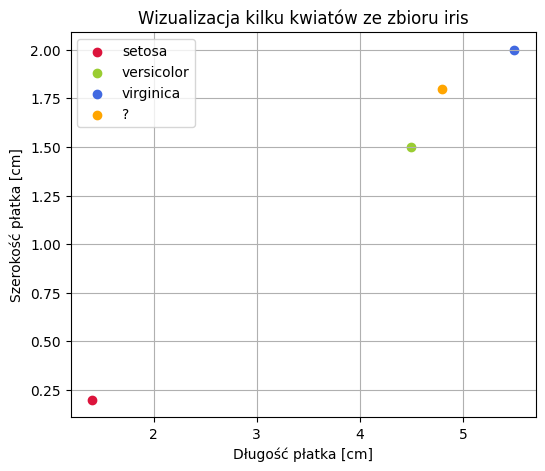

In [138]:
setosa = np.array([1.4, 0.2])  # Długość i szerokość płatka setosa
versicolor = np.array([4.5, 1.5])  # Długość i szerokość płatka versicolor
virginica = np.array([5.5, 2.0])  # Długość i szerokość płatka virginica

# nieznany kwiat
unknown_flower = np.array([4.8, 1.8])

plt.figure(figsize=(6, 5))
plt.scatter(setosa[0], setosa[1], color='crimson', label='setosa')
plt.scatter(versicolor[0], versicolor[1], color='yellowgreen', label='versicolor')
plt.scatter(virginica[0], virginica[1], color='royalblue', label='virginica')
plt.scatter(unknown_flower[0], unknown_flower[1], color='orange', label='?')
plt.xlabel('Długość płatka [cm]')
plt.ylabel('Szerokość płatka [cm]')
plt.title('Wizualizacja kilku kwiatów ze zbioru iris')
plt.legend()
plt.grid(True)
plt.show()

Dla nieznanego kwiata spróbuj określić jego gatunek poprzez sprawdzenie do którego ze znanych kwiatów jest najbardziej podobny. Możesz skorzystać ze wzoru na odległość między punktami w układzie współrzędnych.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(check())` | `versicolor` |
| `print(mydist(unknown_flower, setosa))` | `3.75765884561118` |
| `print(mydist(unknown_flower, versicolor))` | `0.42426406871192` |
| `print(mydist(unknown_flower, virginica))` | `0.72801098892805` |

In [139]:
def mydist(a, b):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def mymin(distances, labels):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    return labels[np.argmin(distances)]

def check():
    dist_to_setosa = mydist(unknown_flower, setosa)
    dist_to_versicolor = mydist(unknown_flower, versicolor)
    dist_to_virginica = mydist(unknown_flower, virginica)

    dists = [dist_to_setosa, dist_to_versicolor, dist_to_virginica]
    labls = ["setosa", "versicolor", "virginica"]

    return mymin(dists, labls)

print(check())
print(mydist(unknown_flower, setosa))
print(mydist(unknown_flower, versicolor))
print(mydist(unknown_flower, virginica))

versicolor
3.757658845611187
0.42426406871192845
0.728010988928052


#### Macierze i tablice 2-wymiarowe

##### Inicjalizacja

Tworzenie tablic 2-wymiarowych jest bardzo podobne jak w przypadku tablic 1-wymiarowych. Jako pierwszy element musimy podać krotkę definującą liczbę wierszy i kolumn. Funkcja [`np.eye()`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) zwraca tablicę, której elementy na głównej przekątnej wynoszą `1`, a poza nią są zerami.

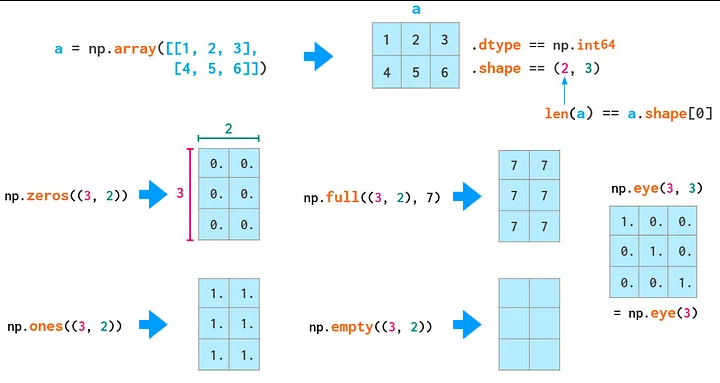

In [140]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [141]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [142]:
a.dtype

dtype('int64')

In [143]:
a.shape

(2, 3)

In [144]:
len(a) # zwraca pierwszy element z shape

2

In [145]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [146]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [147]:
np.ones((3, 2), dtype=np.int64)

array([[1, 1],
       [1, 1],
       [1, 1]])

In [148]:
np.full((3, 2), 7)

array([[7, 7],
       [7, 7],
       [7, 7]])

In [149]:
np.empty((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [150]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [151]:
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [152]:
np.eye(3, 4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

Generowanie losowych macierzy jest również analogiczne:

In [153]:
rng = np.random.default_rng(seed=1337)

In [154]:
rng.integers(0, 10, (3, 5))

array([[5, 8, 7, 1, 5],
       [9, 3, 9, 2, 8],
       [4, 1, 0, 1, 1]])

##### Indeksowanie

Poniżej możemy zobaczyć, że do pobierania poszczególnych elementów tablicy możemy stosować wygodną notację stosującą kokretne pozycje lub wycinki. Przy stosowaniu wycinków również wykorzystywane są widoki, co oznacza, że nie są kopiowane wartości tablicy.

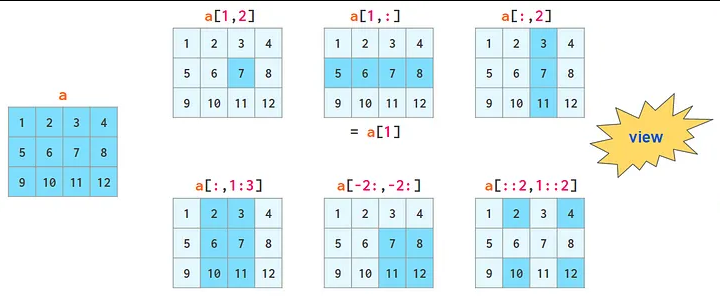

In [155]:
a = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])

In [156]:
a[1, 2]

np.int64(7)

In [157]:
a[1, :]

array([5, 6, 7, 8])

In [158]:
a[:, 2]

array([ 3,  7, 11])

In [159]:
a[:, 1:3]

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [160]:
a[-2:, -2:]

array([[ 7,  8],
       [11, 12]])

In [161]:
a[::2, 1::2]

array([[ 2,  4],
       [10, 12]])

##### Argument `axis`

Pewne operacje możemy wykonywać na całych tabliach, a niektóre względem wierszy lub kolumn. Do wskazania po którym wymiarze ma zostać wykonana dana operacja funkcje często przyjmują argument `axis` (z ang. oś). W przypadku tablic 2-wymiarowych `axis=0` oznacza operacje po kolumnach, a `axis=1` po wierszach.

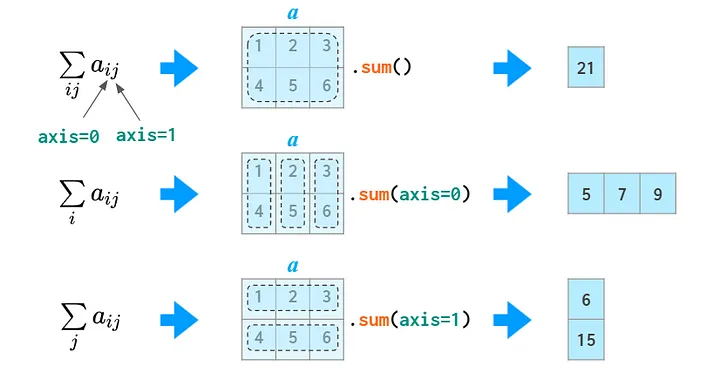

In [162]:
a = np.array([[1,  2,  3],
              [4,  5,  6]])

In [163]:
a.sum()

np.int64(21)

In [164]:
a.sum(axis=0)

array([5, 7, 9])

In [165]:
a.sum(axis=1)

array([ 6, 15])

In [166]:
a.sum(axis=1, keepdims=True)

array([[ 6],
       [15]])

##### Operacje na macierzach

Operatory arytmetyczne są analogiczne do tych, które widzieliśmy w przypadku tablic 1-wymiarowych. Mnożenie macierzy odbywa się poprzez `@`, które jest aliasem dla funkcji [`np.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html).

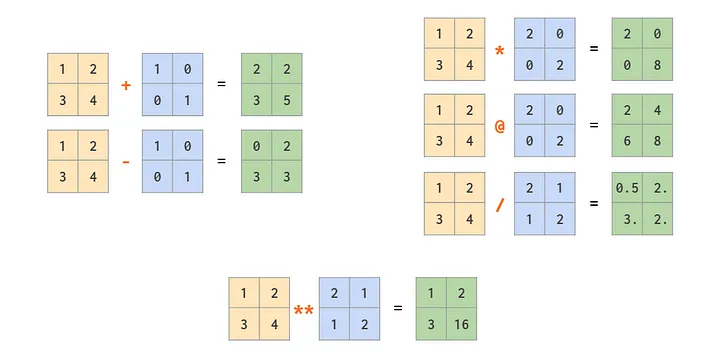

In [167]:
a = np.array([[1, 2],
              [3, 4]])
b = np.array([[1, 0],
              [0, 1]])

In [168]:
a + b

array([[2, 2],
       [3, 5]])

In [169]:
a - b

array([[0, 2],
       [3, 3]])

In [170]:
a = np.array([[1, 2],
              [3, 4]])
c = np.array([[2, 0],
              [0, 2]])

In [171]:
a * c

array([[2, 0],
       [0, 8]])

In [172]:
a @ c

array([[2, 4],
       [6, 8]])

In [173]:
np.matmul(a, c)

array([[2, 4],
       [6, 8]])

In [174]:
a = np.array([[1, 2],
              [3, 4]])
d = np.array([[2, 1],
              [1, 2]])

In [175]:
a / d

array([[0.5, 2. ],
       [3. , 2. ]])

In [176]:
a ** d

array([[ 1,  2],
       [ 3, 16]])

Poniżej mamy przykład mnożenia macierzy o wymiarach `2x3` i `3x2`:

In [177]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[10, 11],
              [20, 21],
              [30, 31]])

In [178]:
a @ b

array([[140, 146],
       [320, 335]])

In [179]:
b @ a

array([[ 54,  75,  96],
       [104, 145, 186],
       [154, 215, 276]])

In [180]:
np.matmul(a, b)

array([[140, 146],
       [320, 335]])

In [181]:
np.matmul(b, a)

array([[ 54,  75,  96],
       [104, 145, 186],
       [154, 215, 276]])

##### Zadanie 3 (1 pkt)

Brak łączności dodawania w przypadku liczb zmiennopozycyjnych oznacza, że wynik operacji może się różnić w zależności od kolejności, w której są wykonywane dodawania. Jest to spowodowane ograniczoną precyzją i zaokrągleniami, które zachodzą podczas obliczeń zmiennoprzecinkowych. Sprawdzimy to w praktyce na przykładzie dodawania trzech niewielkich macierzy.

Stwórz 3 macierze `2x2` o typie danych `np.float64`:

$A = \begin{bmatrix}1.0 \times 10^{-16} & 1.0\\1.0 & 1.0\end{bmatrix}$

$B = \begin{bmatrix}1.0 & 1.0\\1.0 \times 10^{-16} & 1.0\end{bmatrix}$

$C = \begin{bmatrix}-1.0 & -1.0\\-1.0 & -1.0\end{bmatrix}$

(Liczbę $1.0 \times 10^{-16}$ możesz zapisać w Pythonie jako `1.0e-16`.)

Następnie oblicz:

$X = (A + B) + C$

$Y = A + (B + C)$

Sprawdź przy pomocy funkcji [`np.array_equal()`](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) czy $X$ i $Y$ są takie same; wynik sprawdzenia zapisz w zmiennej `are_the_same`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(X)` | <code>[[0. 1.]<br>&nbsp;[0. 1.]]</code> |
| `print(Y)` |  <code>[[1.00000000e-16 1.00000000e+00]<br>&nbsp;[1.11022302e-16 1.00000000e+00]]</code> |

In [182]:
# UMIEŚĆ SWÓJ KOD TUTAJ
A = np.matrix([[1.0e-16, 1],
          [1, 1]])
B = np.matrix([[1, 1],
          [1.0e-16, 1]])
C = np.matrix([[-1, -1],
          [-1, -1]])

X = (A+B)+C
Y = A+(B+C)

are_the_same = np.array_equal(X, Y)
print(X)
print(Y)

[[0. 1.]
 [0. 1.]]
[[1.00000000e-16 1.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


----

W przypadku tablic 2-wymiarowych możemy lepiej zaobserwować jak działa wspomniany wcześniej [*broadcasting*](https://numpy.org/doc/stable/user/basics.broadcasting.html):

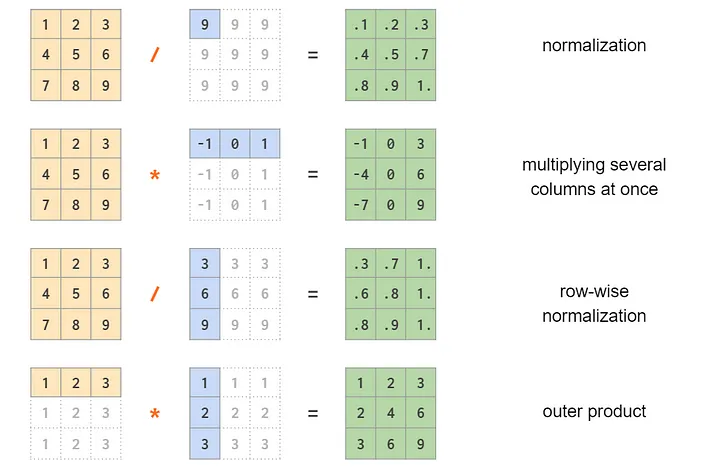

In [183]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In [184]:
a / 9

array([[0.11111111, 0.22222222, 0.33333333],
       [0.44444444, 0.55555556, 0.66666667],
       [0.77777778, 0.88888889, 1.        ]])

In [185]:
b = np.array([-1, 0, 1])

In [186]:
a * b

array([[-1,  0,  3],
       [-4,  0,  6],
       [-7,  0,  9]])

In [187]:
c = np.array([[3],
              [6],
              [9]])

In [188]:
a / c

array([[0.33333333, 0.66666667, 1.        ],
       [0.66666667, 0.83333333, 1.        ],
       [0.77777778, 0.88888889, 1.        ]])

In [189]:
a = np.array([[1, 2, 3]])
b = np.array([[1],
              [2],
              [3]])

In [190]:
a * b

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

W przypadku wektorów wierszowych i kolumnowych w zależności od kolejności argumentów operacji iloczynu uzyskamy iloczyn skalarny lub zewnętrzny.

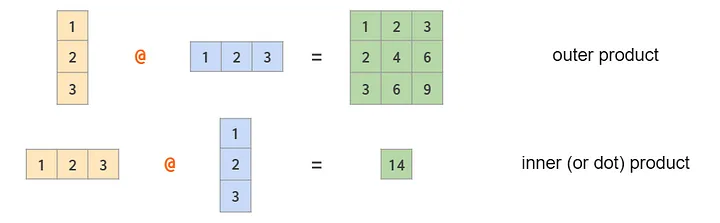

In [191]:
b @ a

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [192]:
a @ b

array([[14]])

##### Wektory wierszowe i kolumnowe

Poprzez pole [`T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) tablicy możemy uzyskać jej transpozycję, który jednocześnie jest *widokiem*.

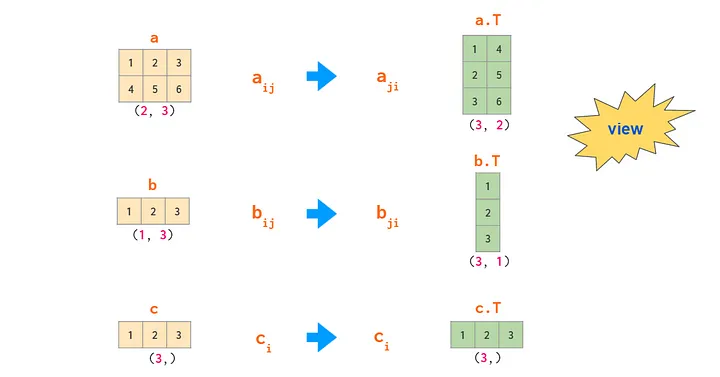

In [193]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
a.shape

(2, 3)

In [194]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [195]:
a.T.shape

(3, 2)

In [196]:
b = np.array([[1, 2, 3]])
b.shape

(1, 3)

In [197]:
b.T

array([[1],
       [2],
       [3]])

In [198]:
b.T.shape

(3, 1)

In [199]:
c = np.array([1, 2, 3])
c.shape

(3,)

In [200]:
c.T

array([1, 2, 3])

In [201]:
c.T.shape

(3,)

Zmianę wymiarów tablicy możemy uzyskać poprzez metodę [`reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html). Dzięki temu np. 1-wymiarowa tablica może stać się 2-wymiarowa. Wstawiając wartość `-1` do powyższej metody wskazujemy, że dany wymiar ma zostać automatycznie wyliczony.

Zmianę wymiarów można uzyskać również poprzez wycinki i podanie wartości `None` (jest to forma skrótowa dla `np.newaxis`).

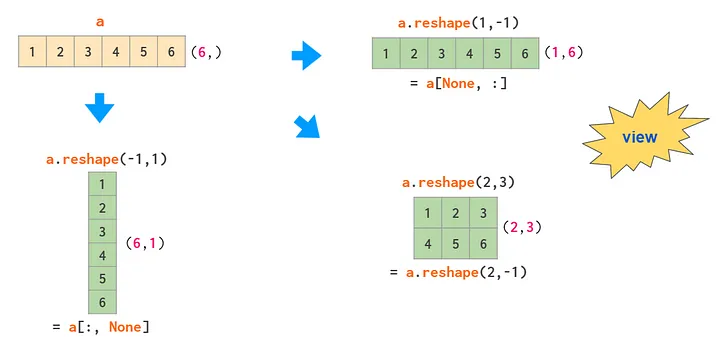

In [202]:
a = np.array([1, 2, 3, 4, 5, 6])

In [203]:
a.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [204]:
a.reshape(-1, 1).shape

(6, 1)

In [205]:
a[:, None]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [206]:
a[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [207]:
a.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6]])

In [208]:
a.reshape(1, -1).shape

(1, 6)

In [209]:
a[None, :]

array([[1, 2, 3, 4, 5, 6]])

In [210]:
a.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [211]:
a.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

Możliwości zmiany wymiarów tablic jest wiele, co prezentuje poniższy diagram. Do tej operacji może być dodatkowo wykorzystana metoda [`flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) (zawsze zwraca kopię) lub funkcja [`np.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) (zwykle zwraca widok). Wybór podejścia zależy od konkretnej potrzeby.

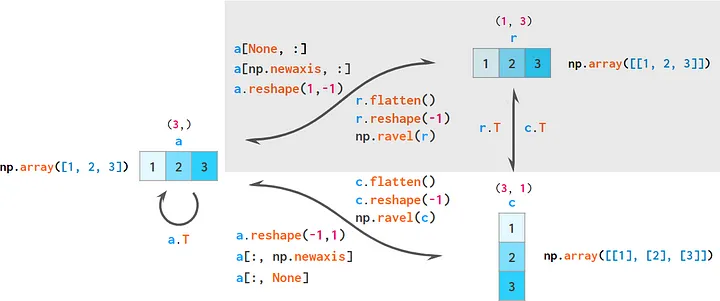

##### Operacje tablicowe

Do częstych operacji na tablicach należy ich łączenie, które w przypadku tablic 2-wymiarowych może odbywać się po wierszach lub kolumnach. Wykorzystuje się tutaj funkcje [`np.hstack()`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) i [`np.vstack()`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html), odpowiednio z ang. *horizontal stack* i *vertical stack*.

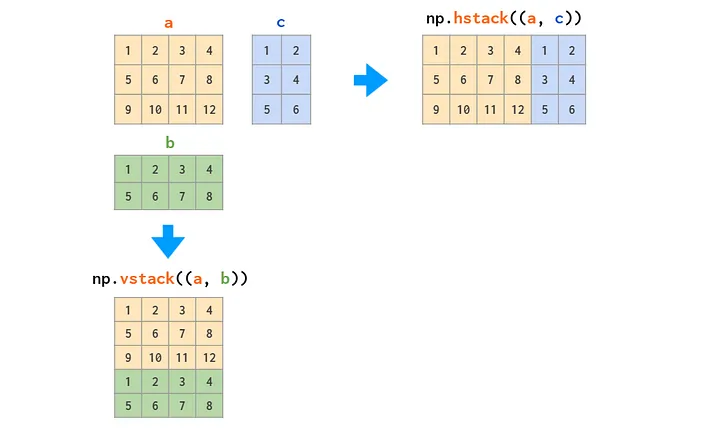

In [212]:
a = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])
b = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8]])
c = np.array([[1, 2],
              [3, 4],
              [5, 6]])

In [213]:
np.vstack((a, b))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 1,  2,  3,  4],
       [ 5,  6,  7,  8]])

In [214]:
np.hstack((a, c))

array([[ 1,  2,  3,  4,  1,  2],
       [ 5,  6,  7,  8,  3,  4],
       [ 9, 10, 11, 12,  5,  6]])

##### Zadanie 4 (2 pkt.)

Macierze są wygodnymi kontenerami na dane, na których można wygodnie wykonywać np. obliczenia statystyczne. Poszczególne kolumny dotyczą danego typu danych, a wiersze są rekordami opisującymi daną jednostkę zbioru danych.

1. Na podstawie sekcji [*Data set*](https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set) artykułu *Iris flower data set*, utwórz macierz $A$, która zawiera dwie kolumny opisujące *Sepal length* i *Sepal width* oraz 5 wierszy opisujących pierwsze 5 kwiatów z ww. zbioru danych.
2. Następnie utwórz macierz $B$ zawierającą dwie kolumny z danymi *Petal length* i *Petal width* oraz 5 wierszy opisujących pierwsze 5 kwiatów z ww. zbioru danych.
3. Połącz macierze $A$ i $B$ *poziomo* przy pomocy funkcji [`np.hstack()`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), a wynik połączenia zapisz w macierzy $C$.
4. Utwórz macierz $D$, która zawiera kolumny *Sepal length*, *Sepal width*, *Petal length* i *Petal width* oraz dane z dwóch kolejnych wierszy ww. zbioru danych.
5. Połącz macierze $C$ i $D$ *pionowo* przy pomocy funkcji [`np.vstack()`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html), a wynik połączenia zapisz w macierzy $E$.
6. Dla każdej kolumny macierzy $E$ oblicz średnią, a wynik zapisz w zmiennej `E_means`. Do obliczenia średniej możesz użyć metody [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html) zmiennej `E` lub możesz użyć funkcji [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) na zmiennej `E`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| `print(A[0, :])` | `[5.1 3.5]` |
| `print(B[0, :])` | `[1.4 0.2]` |
| `print(C[1:4, 1:3])` | <code>[[3.  1.4]<br>&nbsp;[3.2 1.3]<br>&nbsp;[3.1 1.5]]</code> |
| `print(D.shape)` | `(2, 4)` |
| `print(E.shape)` | `(7, 4)` |
| `print(E_means)` | <code>[4.9&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.38571429&nbsp;1.44285714&nbsp;0.25714286]</code> |

In [215]:
# UMIEŚĆ SWÓJ KOD TUTAJ
A = np.matrix([
                [5.1, 3.5],
                [4.9, 3.0],
                [4.7, 3.2],
                [4.6, 3.1],
                [5.0, 3.6]
                ])
B = np.matrix([
                [1.4, 0.2],
                [1.4, 0.2],
                [1.3, 0.2],
                [1.5, 0.2],
                [1.4, 0.3]
                ])

C = np.hstack((A, B))
D = np.matrix([
                [5.4, 3.9, 1.7, 0.4],
                [4.6, 3.4, 1.4, 0.3]
                ])

E = np.vstack((C, D))

E_means = np.mean(E, axis=0)

print(A[0, :])
print(B[0, :])
print(C[1:4, 1:3])
print(D.shape)
print(E.shape)
print(E_means)

[[5.1 3.5]]
[[1.4 0.2]]
[[3.  1.4]
 [3.2 1.3]
 [3.1 1.5]]
(2, 4)
(7, 4)
[[4.9        3.38571429 1.44285714 0.25714286]]


----

W przypadku dołączenia wektora 1-wymiarowego po wierszach należy albo mu zmienić wymiary, albo wykorzystać funkcję [`np.column_stack()`](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html). Dołączenie po kolumnach jest bez zmian.

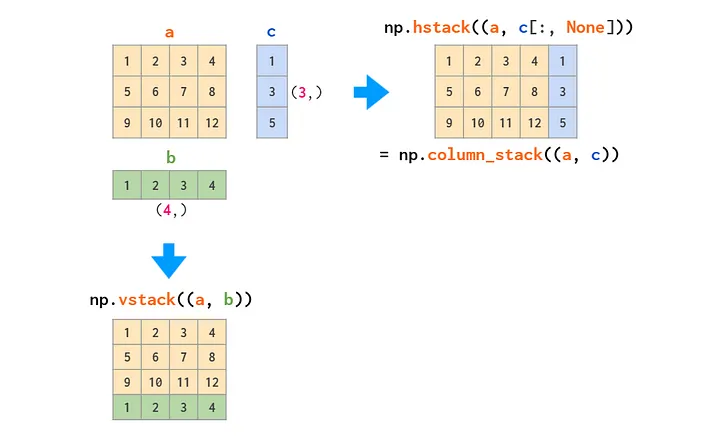

In [216]:
a = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])
b = np.array([1,  2,  3,  4])
c = np.array([1, 3, 5])

In [217]:
np.vstack((a, b))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 1,  2,  3,  4]])

In [218]:
np.hstack((a, c[:, None]))

array([[ 1,  2,  3,  4,  1],
       [ 5,  6,  7,  8,  3],
       [ 9, 10, 11, 12,  5]])

In [219]:
np.column_stack((a, c))

array([[ 1,  2,  3,  4,  1],
       [ 5,  6,  7,  8,  3],
       [ 9, 10, 11, 12,  5]])

Tablice możemy również dzielić przy pomocy funkcji [`np.hsplit()`](https://numpy.org/doc/stable/reference/generated/numpy.hsplit.html) i [`np.vsplit()`](https://numpy.org/doc/stable/reference/generated/numpy.vsplit.html), w których miejsce podziału w najprostszej wersji podajemy jako jednoelementową listę wskazującą indeks dzielący:

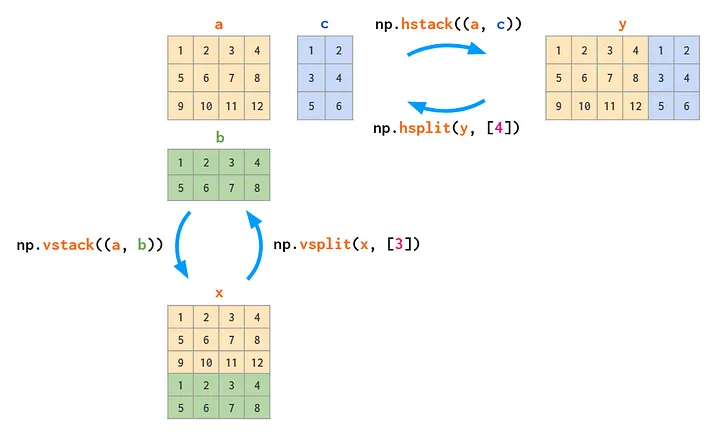

In [220]:
x = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12],
              [1,  2,  3,  4],
              [5,  6,  7,  8]])
np.vsplit(x, [3])

[array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([[1, 2, 3, 4],
        [5, 6, 7, 8]])]

In [221]:
y = np.array([[1,  2,  3,  4, 1, 2],
              [5,  6,  7,  8, 3, 4],
              [9, 10, 11, 12, 5, 6]])
np.hsplit(y, [4])

[array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]]),
 array([[1, 2],
        [3, 4],
        [5, 6]])]

Możemy również podać więcej miejsc podziału lub liczbę równych podziałów:

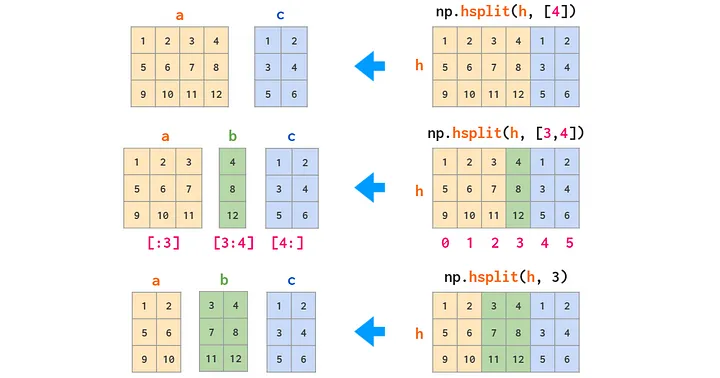

In [222]:
np.hsplit(y, [3, 4])

[array([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 9, 10, 11]]),
 array([[ 4],
        [ 8],
        [12]]),
 array([[1, 2],
        [3, 4],
        [5, 6]])]

In [223]:
np.hsplit(y, 3)

[array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3,  4],
        [ 7,  8],
        [11, 12]]),
 array([[1, 2],
        [3, 4],
        [5, 6]])]

Do replikacji macierzy możemy użyć funkcji [`np.tile()`](https://numpy.org/doc/stable/reference/generated/numpy.tile.html) lub metody [`repeat()`](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html).

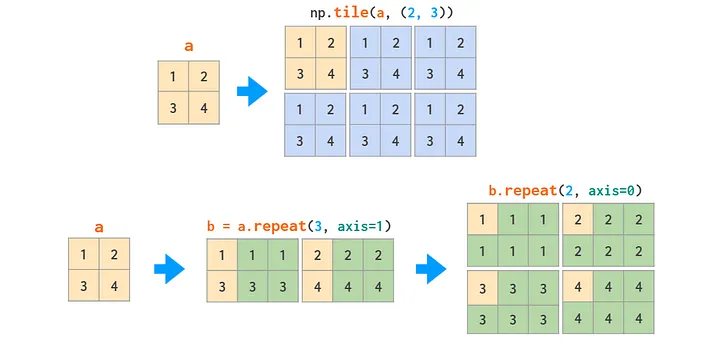

In [224]:
a = np.array([[1, 2],
              [3, 4]])

In [225]:
np.tile(a, (2, 3))

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4],
       [1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [226]:
b = a.repeat(3, axis=1)
b

array([[1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4]])

In [227]:
b.repeat(2, axis=0)

array([[1, 1, 1, 2, 2, 2],
       [1, 1, 1, 2, 2, 2],
       [3, 3, 3, 4, 4, 4],
       [3, 3, 3, 4, 4, 4]])

Do usuwania kolumn używamy funkcji [`np.delete()`](https://numpy.org/doc/stable/reference/generated/numpy.delete.html). Zakresy kolumn możemy podać poprzez stosowanie wycinków na obiekcie [`np.s_`](https://numpy.org/doc/stable/reference/generated/numpy.s_.html) lub używając funkcji [`slice()`](https://docs.python.org/3/library/functions.html#slice).

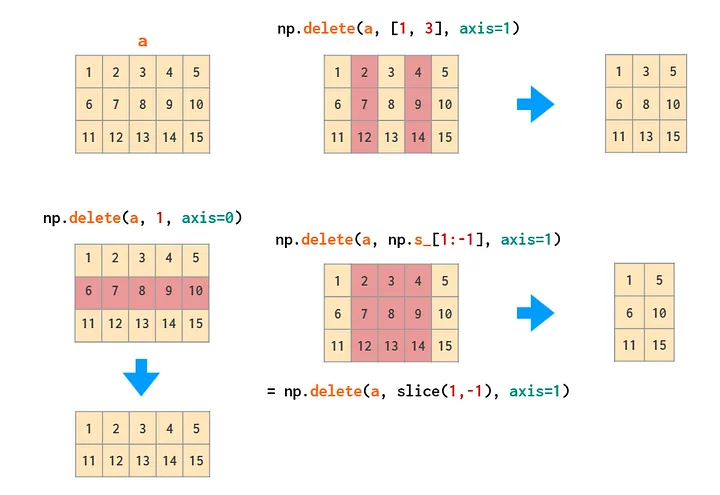

In [228]:
a = np.array([[ 1,  2,  3,  4,  5],
              [ 6,  7,  8,  9, 10],
              [11, 12, 13, 14, 15]])

In [229]:
np.delete(a, 1, axis=0)

array([[ 1,  2,  3,  4,  5],
       [11, 12, 13, 14, 15]])

In [230]:
np.delete(a, [1, 3], axis=1)

array([[ 1,  3,  5],
       [ 6,  8, 10],
       [11, 13, 15]])

In [231]:
np.delete(a, np.s_[1:-1], axis=1)

array([[ 1,  5],
       [ 6, 10],
       [11, 15]])

In [232]:
np.delete(a, slice(1,- 1), axis=1)

array([[ 1,  5],
       [ 6, 10],
       [11, 15]])

Do wstawienia danych do tablicy używamy funkcji [`np.insert()`](https://numpy.org/doc/stable/reference/generated/numpy.insert.html).

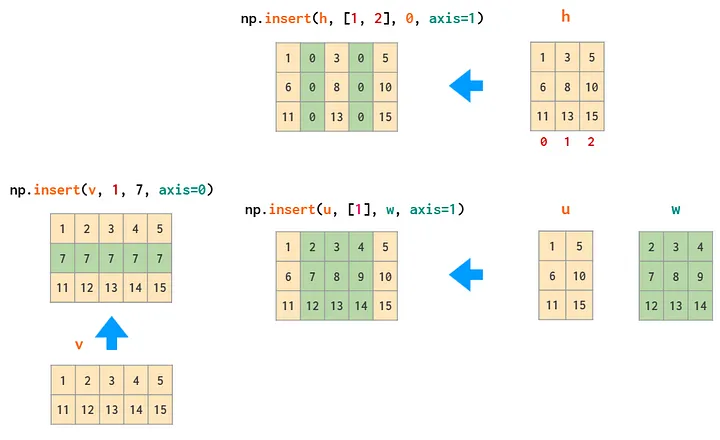

In [233]:
h = np.array([[ 1,  3,  5],
              [ 6,  8, 10],
              [11, 13, 15]])

In [234]:
np.insert(h, [1, 2], 0, axis=1)

array([[ 1,  0,  3,  0,  5],
       [ 6,  0,  8,  0, 10],
       [11,  0, 13,  0, 15]])

In [235]:
v = np.array([[ 1,  2,  3,  4,  5],
              [11, 12, 13, 14, 15]])

In [236]:
np.insert(v, 1, 7, axis=0)

array([[ 1,  2,  3,  4,  5],
       [ 7,  7,  7,  7,  7],
       [11, 12, 13, 14, 15]])

In [237]:
u = np.array([[ 1,  5],
              [ 6, 10],
              [11, 15]])
w = np.array([[ 2,  3,  4],
              [ 7,  8,  9],
              [12, 13, 14]])

In [238]:
np.insert(u, [1], w, axis=1)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

Dopisanie danych do końca tablicy (po wierszach lub kolumnach) odbywa się poprzez funkcję [`np.append()`](https://numpy.org/doc/stable/reference/generated/numpy.append.html). W tym wypadku występują te same problemy co z funkcją [`np.hstack()`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html). Należy mieć na uwadze, że funkcja [`np.append()`](https://numpy.org/doc/stable/reference/generated/numpy.append.html) działa ze złożonością $O(n)$, co w przypadku częstych operacji na dużych macierzach (np. w zastosowaniach widzenia komputerowego) może skutkować niezadowalającą wydajnością operacji i należałoby wtedy poszukać alternatywnego rozwiązania.

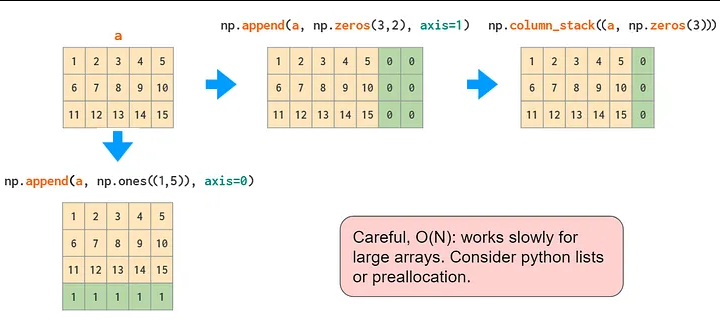

In [239]:
a = np.array([[ 1,  2,  3,  4,  5],
              [ 6,  7,  8,  9, 10],
              [11, 12, 13, 14, 15]])

In [240]:
np.append(a, np.ones((1, 5), dtype=np.int64), axis=0)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [ 1,  1,  1,  1,  1]])

In [241]:
np.append(a, np.zeros((3, 2), dtype=np.int64), axis=1)

array([[ 1,  2,  3,  4,  5,  0,  0],
       [ 6,  7,  8,  9, 10,  0,  0],
       [11, 12, 13, 14, 15,  0,  0]])

In [242]:
np.column_stack((a, np.zeros(3, dtype=np.int64)))

array([[ 1,  2,  3,  4,  5,  0],
       [ 6,  7,  8,  9, 10,  0],
       [11, 12, 13, 14, 15,  0]])

Dodanie stałej wartości na brzegach tablicy można zrealizować poprzez funkcję [`np.pad()`](https://numpy.org/doc/stable/reference/generated/numpy.pad.html).

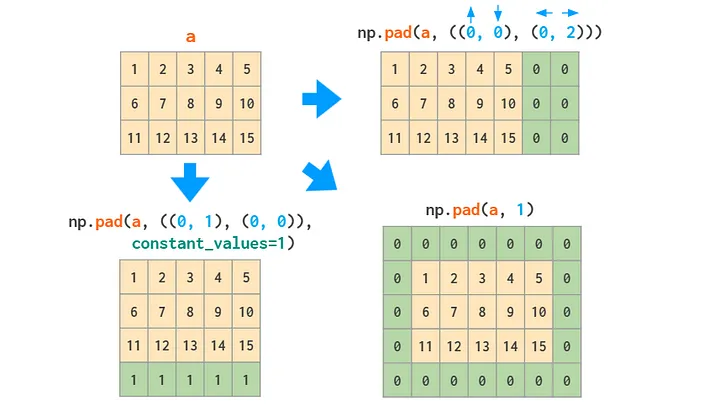

In [243]:
a = np.array([[ 1,  2,  3,  4,  5],
              [ 6,  7,  8,  9, 10],
              [11, 12, 13, 14, 15]])

In [244]:
np.pad(a, ((0, 0), (0, 2)))

array([[ 1,  2,  3,  4,  5,  0,  0],
       [ 6,  7,  8,  9, 10,  0,  0],
       [11, 12, 13, 14, 15,  0,  0]])

In [245]:
np.pad(a, ((0, 1), (0, 0)), constant_values=1)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [ 1,  1,  1,  1,  1]])

In [246]:
np.pad(a, 1)

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  0],
       [ 0,  6,  7,  8,  9, 10,  0],
       [ 0, 11, 12, 13, 14, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

Funkcje i metody do wyliczania statystyk (np. [`max()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), [`min()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [`sum()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sum.html), [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html), [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmax.html) i [`argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html)) przyjmują argument `axis` do wskazania czy obliczenie ma się odbyć dla całej macierzy, czy po kolumnach, czy po wierszach. W przypadku operacji po wierszach czasami wygodniej jest otrzymać wynik zachowujący wymiary źródłowej tablicy i można to uzyskać poprzez podanie argumentu `keepdims=True`.

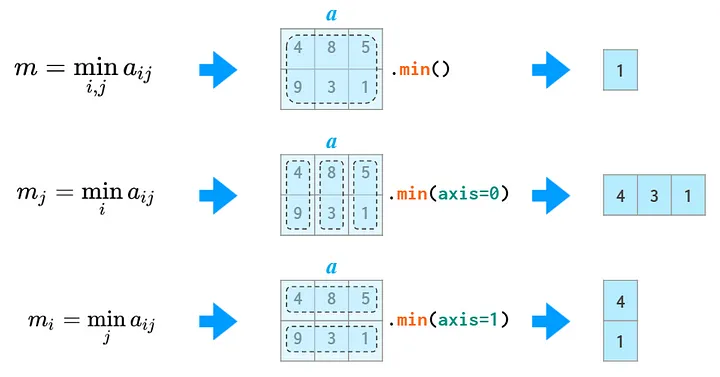

In [247]:
a = np.array([[4, 8, 5],
              [9, 3, 1]])

In [248]:
a.min()

np.int64(1)

In [249]:
a.min(axis=0)

array([4, 3, 1])

In [250]:
a.min(axis=1)

array([4, 1])

In [251]:
a.min(axis=1, keepdims=True)

array([[4],
       [1]])

W przypadku [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmax.html) i [`argmin()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html) zwracany jest indeks 1-wymiarowej spłaszczonej tablicy, co zwykle nie jest pomocne, ale możemy odzyskać oryginalny indeks poprzez wykorzystanie funkcji [`np.unravel_index()`](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html).

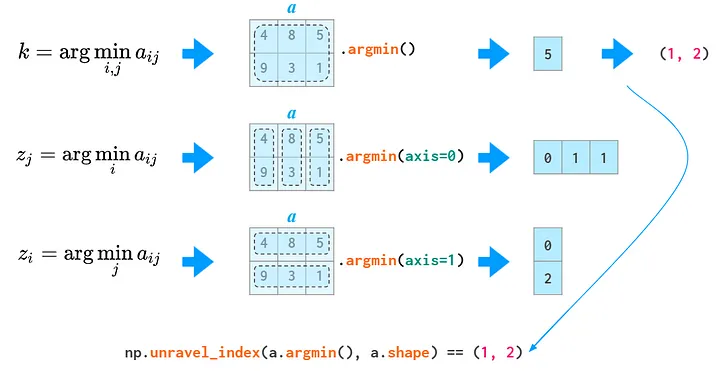

In [252]:
a = np.array([[4, 8, 5],
              [9, 3, 1]])

In [253]:
a.argmin()

np.int64(5)

In [254]:
np.unravel_index(a.argmin(), a.shape)

(np.int64(1), np.int64(2))

In [255]:
a.argmin(axis=0)

array([0, 1, 1])

In [256]:
a.argmin(axis=1)

array([0, 2])

Funkcje [`np.any()`](https://numpy.org/doc/stable/reference/generated/numpy.any.html) i [`np.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) również korzystają z argumentu `axis`.

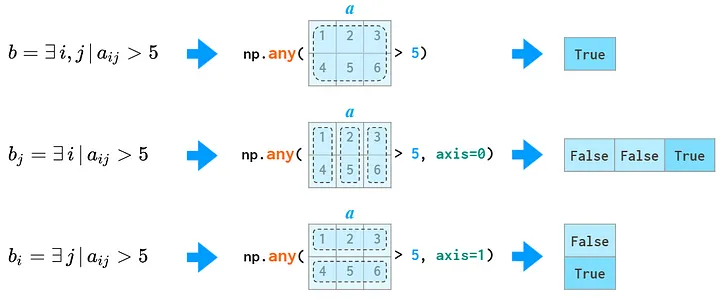

In [257]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

In [258]:
np.any(a > 5)

np.True_

In [259]:
np.any(a > 5, axis=0)

array([False, False,  True])

In [260]:
np.any(a > 5, axis=1)

array([False,  True])

In [261]:
np.any(a > 5, axis=1, keepdims=True)

array([[False],
       [ True]])

Podobnie sortowanie np. przy pomocy funkcji [`np.sort()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html) korzysta z argumentu `axis`:

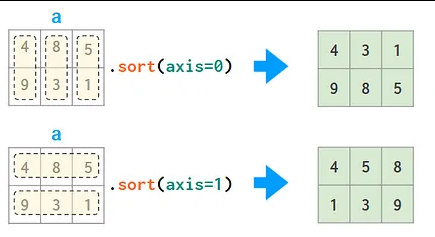

In [262]:
a = np.array([[4, 8, 5],
              [9, 3, 1]])

In [263]:
np.sort(a, axis=0)

array([[4, 3, 1],
       [9, 8, 5]])

In [264]:
np.sort(a, axis=1)

array([[4, 5, 8],
       [1, 3, 9]])

Sortowanie danych w tablicy 2-wymiarowej po danej kolumnie nie jest specjalnie za wygodne w Numpy i akurat przy tym problemie zdecydowanie lepiej wykorzystać bibliotekę [Pandas](https://pandas.pydata.org/).

In [265]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

Naszą 2-wymiarową tablicę zamieniamy na tzw. [ramkę danych](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.html) (ang. *data frame*), która posiada metodę [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) i [`to_numpy()`](https://pandas.pydata.org/pandas-docs/version/2.0/reference/api/pandas.DataFrame.to_numpy.html).

In [ ]:
a = np.array([[52, 93, 15, 72, 61],
              [21, 83, 87, 75, 75],
              [88, 24,  3, 22, 53],
              [ 2, 88, 30, 38,  2],
              [64, 60, 21, 33, 76],
              [58, 22, 89, 49, 91],
              [59, 88, 92, 60, 80],
              [15, 62, 62, 47, 62],
              [51, 55, 64,  3, 51],
              [ 7, 88, 73, 39, 18]])

In [ ]:
pd.DataFrame(a).sort_values(by=[1, 4]).to_numpy()

array([[58, 22, 89, 49, 91],
       [88, 24,  3, 22, 53],
       [51, 55, 64,  3, 51],
       [64, 60, 21, 33, 76],
       [15, 62, 62, 47, 62],
       [21, 83, 87, 75, 75],
       [ 2, 88, 30, 38,  2],
       [ 7, 88, 73, 39, 18],
       [59, 88, 92, 60, 80],
       [52, 93, 15, 72, 61]])

##### Zadanie 5 (4 pkt.)

Napisz funkcję `mymatrixmul()`, w której zaimplementujesz algorytm mnożenia dwóch macierzy podanych jako listy:

* W swoim rozwiązaniu nie wykorzystuj biblioteki NumPy, nie importuj też żadnych innych bibliotek; zaimplementuj mnożenie tak, jak zostało przedstawione na wykładzie i ćwiczeniach.
* Dodatkowo uwzględnij przypadek, w którym mnożenie nie może zostać wykonane; zwróć wtedy `None`.

Przykładowe przypadki testowe, które powinien przejść Twój kod:

| Przypadek testowy | Oczekiwany wynik |
| ----------------- | ---------------- |
| <code>X = [[1, 2], [-2, 0], [3, 1]]<br>Y = [[1, -2, -1, 3], [0, -1, 2, -2]]<br>print(mymatrixmul(X, Y))</code> | `[[1, -4, 3, -1], [-2, 4, 2, -6], [3, -7, -1, 7]]` |
| <code>X = [[1, -2, -1, 3], [0, -1, 2, -2]]<br>Y = [[1, 2], [-2, 0], [3, 1]]<br>print(mymatrixmul(X, Y))</code>  | `None` |
| <code>X = [[5]]<br>Y = [[3]]<br>print(mymatrixmul(X, Y))</code>  | `[[15]]` |
| <code>X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]<br>Y = [[1], [0], [-1]]<br>print(mymatrixmul(X, Y))</code>  | `[[-2], [-2], [-2]]` |

In [ ]:
def mymatrixmul(A, B):
    # UMIEŚĆ SWÓJ KOD TUTAJ
    m_A = len(A)            # row A
    n_A = len(A[0])         # col A
    m_B = len(B)            # row B
    n_B = len(B[0])         # col B

    if(n_A != m_B): return None

    res = []

    for i in range(0, m_A):
        row = []
        for j in range(0, n_B):
            s = 0
            for k in range(0, n_A): 
                s += A[i][k]*B[k][j]
            row.append(s)
        res.append(row)
    return res

X = [[1, 2], 
     [-2, 0], 
     [3, 1]]
Y = [[1, -2, -1, 3], [0, -1, 2, -2]]
print(mymatrixmul(X, Y))

X = [[1, -2, -1, 3], [0, -1, 2, -2]]
Y = [[1, 2], [-2, 0], [3, 1]]
print(mymatrixmul(X, Y))

X = [[5]]
Y = [[3]]
print(mymatrixmul(X, Y))

X = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
Y = [[1], [0], [-1]]
print(mymatrixmul(X, Y))

[[1, -4, 3, -1], [-2, 4, 2, -6], [3, -7, -1, 7]]
None
[[15]]
[[-2], [-2], [-2]]


Po zaimplementowaniu swojego rozwiązania uruchom kolejną komórkę zawierającą gotowy kod, który porówna wydajność Twojej implementacji z implementacją NumPy.

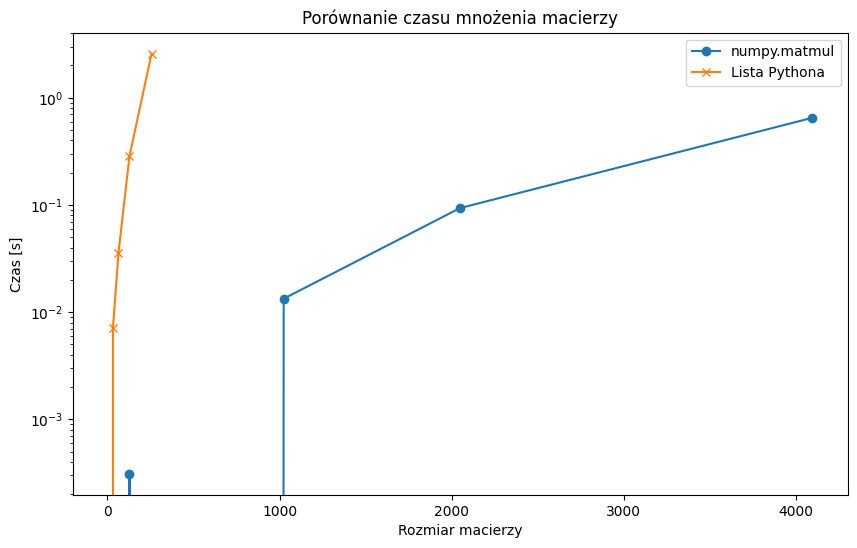

In [ ]:
import time

# Rozmiary macierzy do przetestowania
rozmiary_macierzy = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

# Zapisywanie czasów wykonania
czasy_numpy = []
czasy_listy = []

# Odtwarzalność wyników
rng = np.random.default_rng(seed=1336)

# Liczba testów danego rozmiaru
no_tests = 5

for rozmiar in rozmiary_macierzy:
    A = rng.random((rozmiar, rozmiar*2))
    B = rng.random((rozmiar*2, rozmiar))
    
    # Pomiar czasu dla numpy.matmul
    time_tests = []
    for i in range(no_tests):
        start = time.time()
        np.matmul(A, B)
        end = time.time()
        time_tests.append(end - start)
    czasy_numpy.append(np.mean(time_tests))
    
    # Pomiar czasu dla własnej implementacji
    A_lista = A.tolist()
    B_lista = B.tolist()
    
    if rozmiar <= 256: # Ograniczenie rozmiaru ze względu na czas wykonania
        time_tests = []
        for i in range(no_tests):
            start = time.time()
            mymatrixmul(A_lista, B_lista)
            end = time.time()
            time_tests.append(end - start)
        czasy_listy.append(np.mean(time_tests))
    else:
        czasy_listy.append(None) # Wypełnienie brakujących wartości None dla większych rozmiarów

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(rozmiary_macierzy[:len(czasy_listy)], czasy_numpy[:len(czasy_listy)], label='numpy.matmul', marker='o')
plt.plot(rozmiary_macierzy[:len(czasy_listy)], czasy_listy, label='Lista Pythona', marker='x')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas [s]')
plt.title('Porównanie czasu mnożenia macierzy')
plt.legend()
plt.yscale('log') # Skala logarytmiczna dla lepszego zobrazowania różnic
plt.show()